In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statannot import add_stat_annotation
from scipy.stats import levene

In [32]:
df_1 = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
df_1.head()

,ID,Stage,Concentration
0,UEB-0205,I,0.81
1,UEB-0208,I,0.88
2,UEB-0209,II,0.36
3,UEB-0210,II,1.27
4,UEB-0211,III,1.07


In [33]:
df_2 = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Treatment.csv')
df_2.head()

,ID,Concentration,Treatment,TreatmentV2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,UEB-0228,0.48,Surgery,SX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UEB-0205,0.81,Rad and Chem,RTX-AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UEB-0208,0.88,Chemotherapy,NAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UEB-0209,0.36,Surgery,SX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UEB-0210,1.27,Rad and Chem,RTX-NAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_3 = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
df_3 = df_3[df_3['Stage'].notna()]
df_3['Stage'] = df_3['Stage'].replace({ 'I' : 1 , 'II' : 2 , 'III' : 3 })
df_3

,ID,Stage,Concentration
0,UEB-0205,1,0.81
1,UEB-0208,1,0.88
2,UEB-0209,2,0.36
3,UEB-0210,2,1.27
4,UEB-0211,3,1.07
5,UEB-0213,2,0.32
6,UEB-0215,3,0.56
7,UEB-0216,1,0.50
8,UEB-0218,3,3.18
9,UEB-0219,3,0.49


In [35]:
df_4 = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/VariantCounts.csv')
df_4.dropna(subset = ["cfDNA_concentration"], inplace=True)
df_4 = df_4.sort_values(by=['cfDNA_concentration'], ascending = True)
df_4

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all,CNV_cfDNASNV,All,Status
17,16.0,UEB_0227,81.0,IIIB,Female,NaN,Lobular,Active disease,4.0,0,NaN,NaN,0.28,0.0,0.0,0.0,1.0,1.0,1.0,Paired
6,5.0,UEB_0213,42.0,IIA,Female,Partial,IDC,Remission,2.0,0,0.01495,NaN,0.32,8.0,8.0,0.0,1.0,9.0,9.0,Paired
2,2.0,UEB_0209,51.0,IIA,Female,NaN,IDC,Remission,2.0,0,0.01756,NaN,0.36,32.0,15.0,17.0,0.0,15.0,32.0,Paired
14,13.0,UEB_0222,73.0,IIA,Female,NaN,IDC,Remission,2.0,1,0.00000,NaN,0.43,26.0,0.0,26.0,0.0,0.0,26.0,Paired
18,17.0,UEB_0228,60.0,NaN,Female,NaN,IDC,Active disease,2.0,1,0.01414,NaN,0.48,11.0,11.0,0.0,0.0,11.0,11.0,Paired
11,10.0,UEB_0219,70.0,IIIB,Female,NaN,NaN,Remission,4.0,0,0.01263,NaN,0.49,38.0,38.0,0.0,0.0,38.0,38.0,Paired
8,7.0,UEB_0215,61.0,IIIC,Female,NaN,IDC,Remission,4.0,3,0.01796,Luminal A,0.56,13.0,10.0,3.0,2.0,12.0,15.0,Paired
16,15.0,UEB_0226,NaN,NaN,Female,NaN,Phyllodes,Remission,NaN,NaN,0.01454,NaN,0.64,4.0,4.0,0.0,0.0,4.0,4.0,Paired
15,14.0,UEB_0223,49.0,IIA,Female,NaN,Mucinous,Remission,2.0,0,0.02047,Luminal A,0.71,7.0,7.0,0.0,8.0,15.0,15.0,Paired
0,0.0,UEB_0205,76.0,IA,Female,Partial,IDC,Remission,1.0,0,0.00000,NaN,0.81,7.0,0.0,7.0,1.0,1.0,8.0,Paired


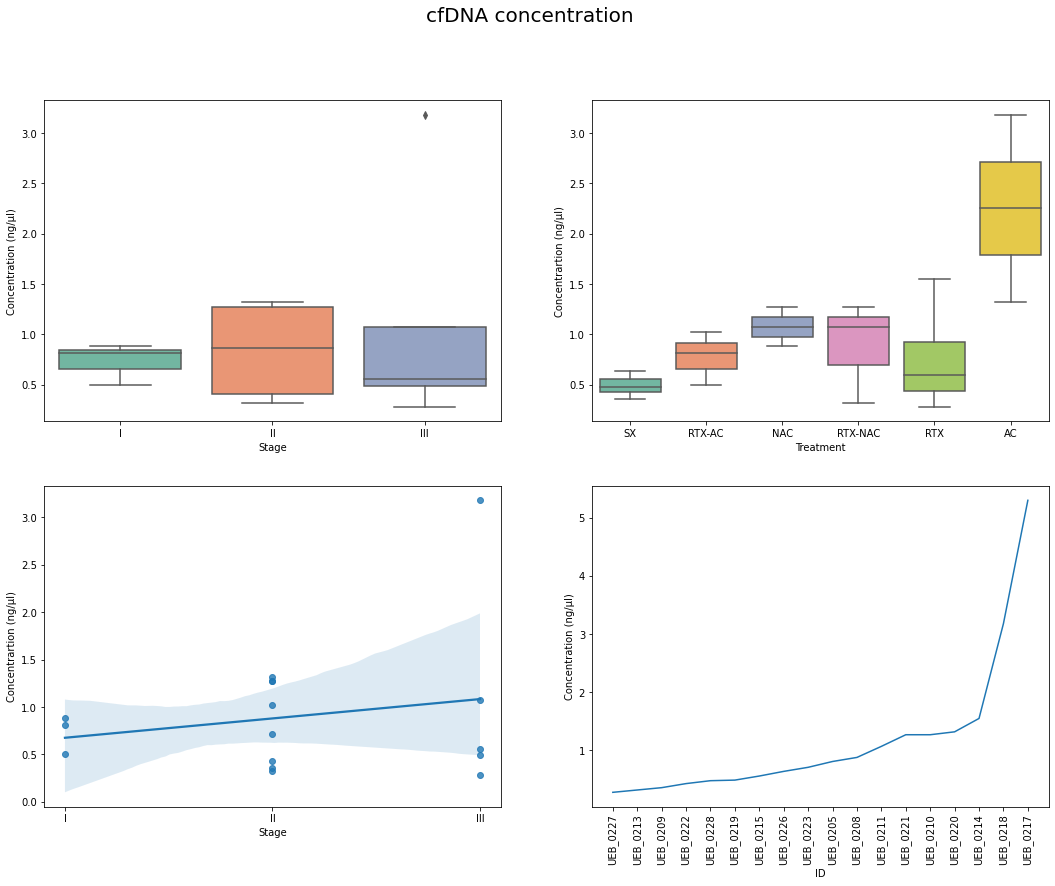

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(18, 13))

fig.suptitle('cfDNA concentration', size = 20)

sns.boxplot(ax = axes[0,0], data=df_1, x='Stage', y='Concentration', palette = "Set2")
axes[0,0].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")

sns.boxplot(ax = axes[0,1],data=df_2, x='TreatmentV2', y='Concentration', palette = "Set2")
axes[0,1].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")


sns.regplot(ax = axes[1,0], x="Stage", y="Concentration", data=df_3)
axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
axes[1,0].set(xticks=np.arange(1,4,1))
axes[1,0].set_xticklabels(['I', 'II', 'III'])

sns.lineplot(ax = axes[1,1], data=df_4, x="ID", y="cfDNA_concentration")
axes[1,1].set(ylabel = "Concentration (ng/μl)")
axes[1,1].tick_params(axis='x', rotation=90)
plt.savefig('/home/fer/Concentration.pdf', dpi=300)

# Ejemplo 

In [38]:
import seaborn as sns
from statannotations.Annotator import Annotator
from scikit_posthocs import posthoc_tukey
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [39]:
iris_obj = load_iris()
iris_df = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)

iris_df["species"] = [iris_obj.target_names[s] for s in iris_obj.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
species = np.unique(iris_df.species)

data = []

for s in species:
    data.append(iris_df[iris_df.species == s]["sepal length (cm)"])

In [48]:
data

[0     5.1
 1     4.9
 2     4.7
 3     4.6
 4     5.0
 5     5.4
 6     4.6
 7     5.0
 8     4.4
 9     4.9
 10    5.4
 11    4.8
 12    4.8
 13    4.3
 14    5.8
 15    5.7
 16    5.4
 17    5.1
 18    5.7
 19    5.1
 20    5.4
 21    5.1
 22    4.6
 23    5.1
 24    4.8
 25    5.0
 26    5.0
 27    5.2
 28    5.2
 29    4.7
 30    4.8
 31    5.4
 32    5.2
 33    5.5
 34    4.9
 35    5.0
 36    5.5
 37    4.9
 38    4.4
 39    5.1
 40    5.0
 41    4.5
 42    4.4
 43    5.0
 44    5.1
 45    4.8
 46    5.1
 47    4.6
 48    5.3
 49    5.0
 Name: sepal length (cm), dtype: float64,
 50    7.0
 51    6.4
 52    6.9
 53    5.5
 54    6.5
 55    5.7
 56    6.3
 57    4.9
 58    6.6
 59    5.2
 60    5.0
 61    5.9
 62    6.0
 63    6.1
 64    5.6
 65    6.7
 66    5.6
 67    5.8
 68    6.2
 69    5.6
 70    5.9
 71    6.1
 72    6.3
 73    6.1
 74    6.4
 75    6.6
 76    6.8
 77    6.7
 78    6.0
 79    5.7
 80    5.5
 81    5.5
 82    5.8
 83    6.0
 84    5.4
 85    6.0
 86    6.7
 

In [41]:
stats.kruskal(*data)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

In [42]:
from scikit_posthocs import posthoc_tukey

# First we do a oneway ANOVA as implemented in SciPy
print(stats.f_oneway(*data))

tukey_df = posthoc_tukey(iris_df, val_col="sepal length (cm)", group_col="species")
tukey_df

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)


,setosa,versicolor,virginica
setosa,1.000,0.001,0.001
versicolor,0.001,1.000,0.001
virginica,0.001,0.001,1.000


In [43]:
remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
3,setosa,versicolor,0.001
6,setosa,virginica,0.001
7,versicolor,virginica,0.001


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Custom statistical test, P_val:1.000e-03
versicolor vs. virginica: Custom statistical test, P_val:1.000e-03
setosa vs. virginica: Custom statistical test, P_val:1.000e-03


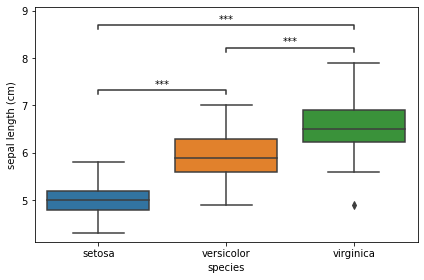

In [22]:
ax = sns.boxplot(data=iris_df, x="species", y="sepal length (cm)", order=species)

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=iris_df, x="species", y="sepal length (cm)", order=species
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()

# Stadistica

In [47]:
df = pd.DataFrame({
    'Concentration': df_2.Concentration,
    'Treatment': df_2.TreatmentV2
})
df

,Concentration,Treatment
0,0.48,SX
1,0.81,RTX-AC
2,0.88,NAC
3,0.36,SX
4,1.27,RTX-NAC
5,1.07,RTX-NAC
6,0.32,RTX-NAC
7,1.55,RTX
8,0.56,SX
9,0.50,RTX-AC


In [50]:
tratamiento = np.unique(df.Treatment)

d = []

for s in tratamiento:
    d.append(df[df.Treatment == s]["Concentration"])
d

[10    3.18
 12    1.32
 Name: Concentration, dtype: float64,
 2     0.88
 13    1.27
 Name: Concentration, dtype: float64,
 7     1.55
 11    0.49
 15    0.71
 18    0.28
 Name: Concentration, dtype: float64,
 1     0.81
 9     0.50
 16    1.02
 Name: Concentration, dtype: float64,
 4    1.27
 5    1.07
 6    0.32
 Name: Concentration, dtype: float64,
 0     0.48
 3     0.36
 8     0.56
 14    0.43
 17    0.64
 Name: Concentration, dtype: float64]

In [54]:
stats.f_oneway(*d)

F_onewayResult(statistic=3.538716047614384, pvalue=0.030731483290958594)

In [55]:
tukey_df_treatment = posthoc_tukey(df, val_col="Concentration", group_col="Treatment")
tukey_df_treatment

,SX,RTX-AC,NAC,RTX-NAC,RTX,AC
SX,1.000000,0.900000,0.729939,0.888907,0.90000,0.012788
RTX-AC,0.900000,1.000000,0.900000,0.900000,0.90000,0.067237
NAC,0.729939,0.900000,1.000000,0.900000,0.90000,0.264539
RTX-NAC,0.888907,0.900000,0.900000,1.000000,0.90000,0.099953
RTX,0.900000,0.900000,0.900000,0.900000,1.00000,0.046450
AC,0.012788,0.067237,0.264539,0.099953,0.04645,1.000000


In [56]:
remove = np.tril(np.ones(tukey_df_treatment.shape), k=0).astype("bool")
tukey_df_treatment[remove] = np.nan

molten_df = tukey_df_treatment.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
6,SX,RTX-AC,0.900000
12,SX,NAC,0.729939
13,RTX-AC,NAC,0.900000
18,SX,RTX-NAC,0.888907
19,RTX-AC,RTX-NAC,0.900000
20,NAC,RTX-NAC,0.900000
24,SX,RTX,0.900000
25,RTX-AC,RTX,0.900000
26,NAC,RTX,0.900000
27,RTX-NAC,RTX,0.900000


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

AC vs. SX: Custom statistical test, P_val:1.279e-02


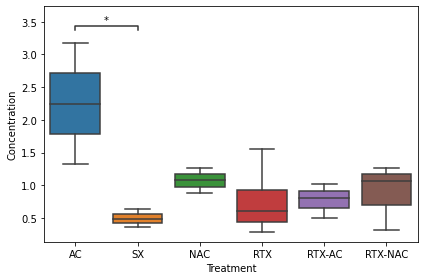

In [85]:
ax = sns.boxplot(data=df, x="Treatment", y="Concentration", order = ['AC', 'SX', 'NAC', 
                                                                     'RTX', 'RTX-AC',
                                                                     'RTX-NAC'
                                                                    ])

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

# Correr solo cuando ya se vio la diferecia significativa
pairs = [('SX', 'AC')]
p_values = [0.012788411103720532]


annotator = Annotator(
    ax, pairs, data=df, x="Treatment", y="Concentration", order=['AC', 'SX', 'NAC', 
                                                                     'RTX', 'RTX-AC',
                                                                     'RTX-NAC'
                                                                    ]
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()

In [82]:
df['Treatment'].value_counts()

SX         5
RTX        4
RTX-AC     3
RTX-NAC    3
NAC        2
AC         2
Name: Treatment, dtype: int64

In [79]:
p_values

[0.9,
 0.729939489944371,
 0.9,
 0.8889070566114203,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.012788411103720532,
 0.0672373961433379,
 0.2645385049937653,
 0.09995324576947384,
 0.04645003520118507]